In [18]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# enfim, como não teve como usar o da boston. vai esse.

In [10]:
housing = fetch_california_housing()
california = pd.DataFrame(housing.data,columns=housing.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<Axes: >

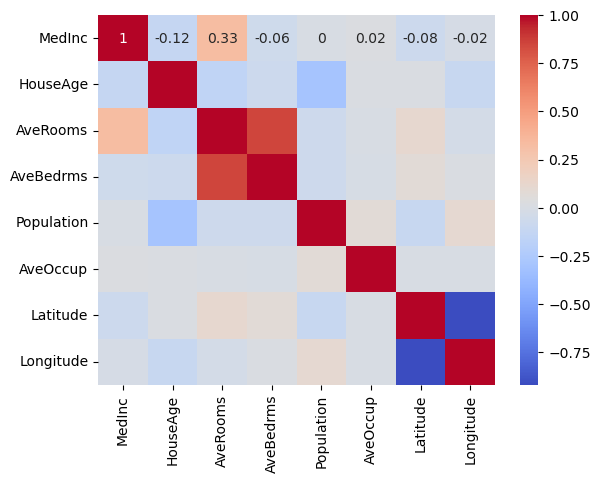

In [13]:
correlation_matrix = california.corr().round(2)

sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm')

tem algum tipo de correlação entre AveBedrmms e AveRooms
também entre averooms e medinc, avebedrms e medinc

In [15]:
target = california['MedInc']
features = ["AveRooms","AveBedrms"]

Agora a gente começa com os modelos de teste e de treino

In [16]:
X = pd.DataFrame(np.c_[california[features[0]],california[features[1]]],columns=features)
Y = target

In [19]:
# separando os dados em de teste e de treino

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [20]:
# agora usamos as funcionalidades de regressão linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
lin_model= LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [22]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.320351661260475
R2 score is 0.5111888483134709




In [24]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 1.3338338274481956
R2 score is 0.529300370745672
